### |Projeto Final - Ciência de dados II - Titanic| 

### Aluno: Patrick Kwan

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

O projeto foi baseado no titanic pois é uma história que agrada os dois integrantes do grupo, um filme que ambos gostam. Com isso, a ideia do trabalho é entender um pouco sobre o titanic, analisar a quantidade dos passageiros, e suas características, que embarcaram e acabaram não sobrevivendo ao acidente.

Dado isso, com análise de dados vamos buscar entender a probabilidade de sobrevivência dado as diferentes condições de cada passageiro.
Fonte: https://www.kaggle.com/c/titanic/data

## Conhecendo os dados

In [ ]:
#Para rodar precisa colocar os dados no drive..
df = pd.read_csv("train.csv")

df.head() #Apenas os 5 primeiros valores(apenas uma demosntração dos dados)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* passengerid = ID do passageiro;
* survived = 1 se sobreviveu, 0 caso contrário.
* pclass = Tipo de classe de passagem. Possui 3 valore sendo 1 a melhor classe e 3 a pior classe.
* name = Nome do passageiro
* sex = sexo do passageiro (M e F).
* age = Idade do passageiro na data do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código da Cabine.
* embarked = Local de embarque.

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* Tipos de dados:

Numéricas:

* variáveis discretas: sibSp
* variáveis contínuas: fare e age.
* binária: survived (booleano).

Categóricas:

* nominais: Name, Sex
* Ordinal: cabin

# Análise do preenchimento dos dados


In [ ]:
# Avaliar o que são os nulos com a área responsável pela base / técnicas de preenchimento

print("Total de passageiros:", df.PassengerId.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotal de nulos por variável:\n", df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False))
print("\nTotal de linhas completamente preenchidas:", df.dropna().shape[0])

Total de passageiros: 891

Total de informação nula na base: 866

Total de nulos por variável:
 Cabin       687
Age         177
Embarked      2
dtype: int64

Total de linhas completamente preenchidas: 183




# **Análise dos outlier**



In [ ]:
#Aqui iremos encontrar os valores atípicos dos dados:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


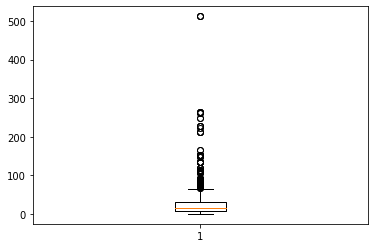

In [ ]:
#Vamos analisar melhor a variável fare. Parece que temos alguns dados discrepantes, puxando a média para cima.
#Pode-se observar a diferença entre média e mediana (mean = 32.204208 e 50%(mediana) = 14.454200).
#Para melhor visualizar o outlier, iremos plotar um boxplot para observar os valores atípicos.
plt.boxplot(df.Fare)
plt.show()

Os outliers são dados que se diferenciam drasticamente de todos os outros e podem acabar distorcendo nossa visão sobre um conjunto de dados. 

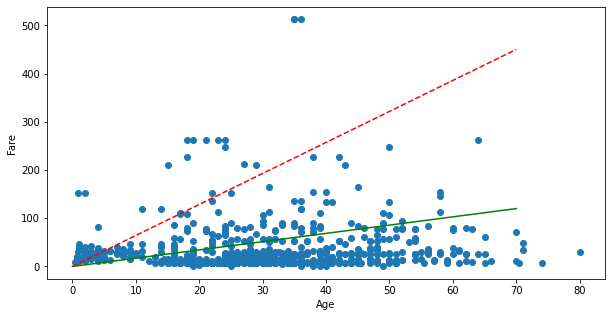

In [ ]:
#Motivação com regressão linear:

plt.figure(figsize=[10,5])
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')

plt.plot([0,70],[0,120], c= 'green')
plt.plot([0,70],[0,450], '--', c='red')
plt.show()

In [ ]:
#Função que calcula todos os componentes do boxplot,identificando os outliers a partir do Limite Superior (LS)
#e Limite Inferior
def detecta_outlier(x, limite = 1.5):
    dq = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * dq, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * dq, np.max(x))
    print("Limite inferior:", limite_inf)
    print("Limite superior:", limite_sup)
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [ ]:
#Chamando a função detecta_outlier:
outliers_fare = detecta_outlier(df.Fare)

Limite inferior: 0.0
Limite superior: 65.6344


In [ ]:
#Aqui iremos pegar todos os valores do Fare e se tiver discrepância, será colocado 1.0 e,senão tiver, 0.0.
#Sendo que o limite superior é 65.6344 e o limite inferior 0.0.
pd.DataFrame(np.c_[df.Fare.values, outliers_fare], columns=['Fare', 'outlier_fare'])

,Fare,outlier_fare
0,7.2500,0.0
1,71.2833,1.0
2,7.9250,0.0
3,53.1000,0.0
4,8.0500,0.0
...,...,...
886,13.0000,0.0
887,30.0000,0.0
888,23.4500,0.0
889,30.0000,0.0


# Análise de frequência: Vamos olhar mais a fundo algumas variáveis do nosso dataframe.



In [ ]:
df.Sex[:5]

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
#Tabela de frequência pra uma variável:

tbl_freq_sex = pd.DataFrame(df.Sex.value_counts())
tbl_freq_sex.rename(columns = {'Sex':'freq_absoluta'}, inplace = True)
tbl_freq_sex['freq_relativa'] = round(tbl_freq_sex.freq_absoluta  /tbl_freq_sex.freq_absoluta.sum(),2)
tbl_freq_sex

,freq_absoluta,freq_relativa
male,577,0.65
female,314,0.35


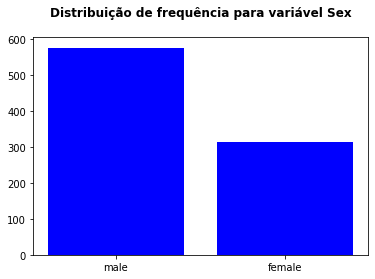

In [ ]:
# Podemos ver graficamente essa distribuição:

plt.bar(df.Sex.unique(), df.Sex.value_counts(), color = 'blue')
plt.title('Distribuição de frequência para variável Sex\n', {'fontsize': 12,'fontweight': 'bold'})
plt.show()

Qual a probabilidade de sobreviver um homem ou uma mulher?

$ P(A|B) = \dfrac{P(A \cap B)}{P(B)}$

In [ ]:
#probabilidade de todos sobreviverem:
#Se sobreviveu recebe 1 e se não sobreviver 0

round(df.Survived.value_counts()/df.Survived.shape[0],2)

0    0.62
1    0.38
Name: Survived, dtype: float64

In [ ]:
# A: sobreviver
# B: homem ou mulher

prob_homem = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_mulher = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de um homem sobreviver:", round(prob_homem,2))
print("Probabilidade de uma mulher sobreviver:", round(prob_mulher,2))


Probabilidade de um homem sobreviver: 0.19
Probabilidade de uma mulher sobreviver: 0.74


In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
#Como o min foi 0, então tem passgaiero que não pagou a passagem
#Iremos investigar quem são esses passageiros.

df[df.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


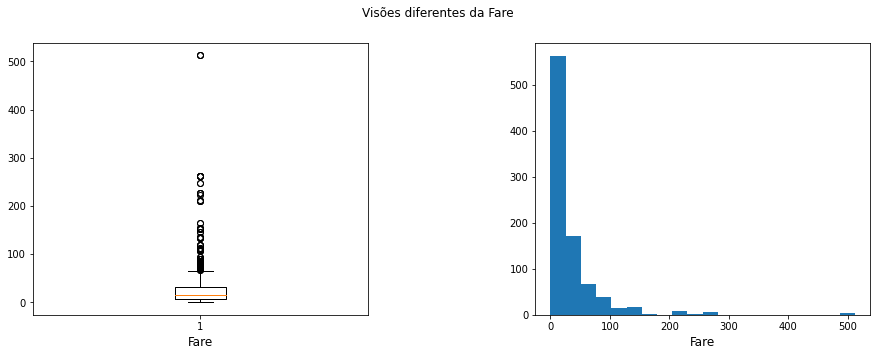

In [ ]:
#Aqui iremos mostrar graficamente, de 2 modos, os passageiros que não pagaram pela viagem
fig = plt.figure(figsize=(15,5)) #tamanho do frame 
plt.subplots_adjust(wspace= 0.5) #espaço entre os graficos
plt.suptitle('Visões diferentes da Fare') #titulo geral
plt.subplot(1,2,1) #posição do primeiro gráfico 
plt.boxplot(df.Fare, meanline = True)
plt.xlabel('Fare', {'fontsize': 12}) #legenda no eixo x
plt.subplot(1,2,2) #Posição do segundo gráfico
plt.hist(df.Fare, bins = 20)
plt.xlabel('Fare', {'fontsize': 12})
plt.show()

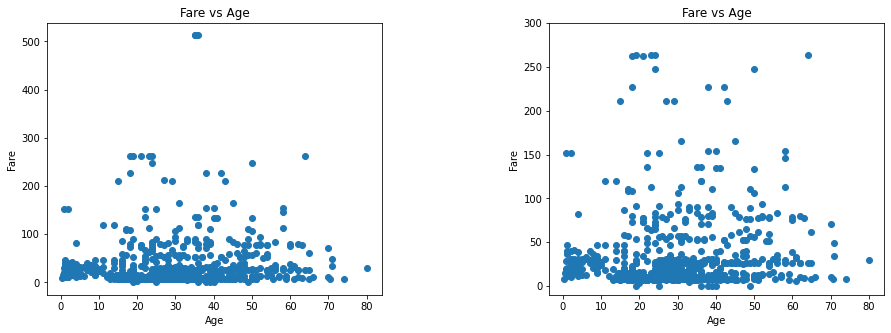

In [ ]:
#Aqui iremos comparar a compra da passagem com a idade
plt.figure(figsize=[15,5])
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.title("Fare vs Age")
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.subplot(1,2,2)
plt.title("Fare vs Age")
plt.scatter(df.Age, df.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.ylim([-10,300])
plt.show()

In [ ]:
# df.corr() calcula a correlação da fare com todas as variáveis do df, cujo tipo é numérico. 
# Aqui selecionamos apenas a coluna fare.

df.corr()[['Fare']]

,Fare
PassengerId,0.012658
Survived,0.257307
Pclass,-0.549500
Age,0.096067
SibSp,0.159651
Parch,0.216225
Fare,1.000000


Como mostrado a cima, a probabilidade de sobrevicência está muito relacionado com o preço da passagem, por exemplo: O fare tem uma grande correlação com o pclass (tipo de classe da passagem), ou seja, a classe que estão mais proximas ao mar (mais abaixo do navio), ou seja, pagaram menos, tem uma probabilidade menor de sobreviver. 

